In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import scipy as scp
import scipy.stats as stats
from matplotlib import pyplot as plt

import time
from datetime import datetime

from scipy.interpolate import make_interp_spline

import matplotlib.colors as mcol
import matplotlib.cm as cm

import matplotlib.ticker as ticker

import math

from dateutil import parser

import DataLoader_module

In [2]:
My_DataLoader = DataLoader_module.DataLoader('/home/opv002/py_notes/for_Marina/Initial_Data/')

My_DataLoader.prepare_dict()

columns_to_save = ['Volksgarten - 1','Volksgarten - 2','Mülheimer Park','Mülheimer Park 2','Opel Bauer',\
                   'Rheininsel','Bahnhof Mülheim','datetime','date','time']

My_DataLoader.process_data(columns_to_save=columns_to_save)
My_DataLoader.prepare_dict_year()
My_DataLoader.prepare_dict_year_day()

My_DataLoader.prepare_df_gb_datetime()
My_DataLoader.prepare_df_gb_date_mean()
My_DataLoader.prepare_df_gb_datetime_day()
My_DataLoader.prepare_df_gb_date_mean_day()

data_gb_date_mean = My_DataLoader.get_df_gb_date_mean()
data_gb_date_mean_day = My_DataLoader.get_df_gb_date_mean_day()

data_gb_datetime = My_DataLoader.get_df_gb_datetime()
data_gb_datetime_day = My_DataLoader.get_df_gb_datetime_day()

locations = ['Volksgarten - 1','Volksgarten - 2','Mülheimer Park','Mülheimer Park 2','Opel Bauer',\
                   'Rheininsel','Bahnhof Mülheim']

In [3]:
My_DataAnalyzer = DataLoader_module.DataAnalyzer(data_gb_date_mean_day)

# ------------------------------------ summer 2020 ------------------------------------

In [4]:
data = My_DataAnalyzer.get_data(date_from='2020-07-01',date_to='2020-08-31')
data_params = My_DataAnalyzer.get_data_params()

In [5]:
data_dropped = My_DataAnalyzer.get_data_dropped()
data_dropped_params = My_DataAnalyzer.get_data_dropped_params()

Входе анализа проверяется гипотеза о равенстве средних температур для всех локаций (нулевая гипотеза).

p-value это вероятность получить такое или более сильное отклонение с учетом того, что нулевая гипотеза верна. Проще говоря, это вероятность получить такие распределения температур при условии что все выборки брались из одной генеральной совокупности с одним средним. Получается, чем меньше p-value, тем меньше вероятность того что все выборки получены из одной генеральной совокупности.

Обычно, если p-value < 0.05, то считается что у нас ДОСТАТОЧНО оснований отклонить нулевую гипотезу. Если же p-value > 0.05, то оснований отклонить ее НЕ ДОСТАТОЧНО.

Доверительные интервалы (Confidence Interval, CI) рассчитываются как интервалы покрывающие 95% площади гаусианы, если выборочное среднее (здесь и у нас 0) попадает в этот интервал значит не отклоняем гипотезу. 

Понятнее будет картнка ниже. У нас есть генеральная соовокупность (синяя гистограмма и гаусиана) и мы извлекаем из нее некие выборки (например как у нас распределения температур летом). У этих выборок мы считаем средние значения $\bar{x_1}, \bar{x_2}, \bar{x_3}, \bar{x_4}$ и у 3 из 4 CI включает в себя НАСТОЯЩЕЕ СРЕДНЕЕ генеральной совокупности, в том время как для 4 НЕ ВКЛЮЧАЕТ, это значит что нулевая гипотеза для нее не верна и 4 расрпделение, а значит и его среднее получено НЕ из синей генеральной совокупности.

Похоже на наш случай: представим, что все наши локации имеют одинаковые средние тепературы летом (например все они зеленые зоны, нулевая гипотеза), делаем анализ средних и получает что да действительно 3 из 4 с p-value > 0.05 дейтсвительно одинаковые получены из одного распределения, а одна локация с p-value < 0.05 выбивается из этой группы значит скорее всего не является зеленой зоной.

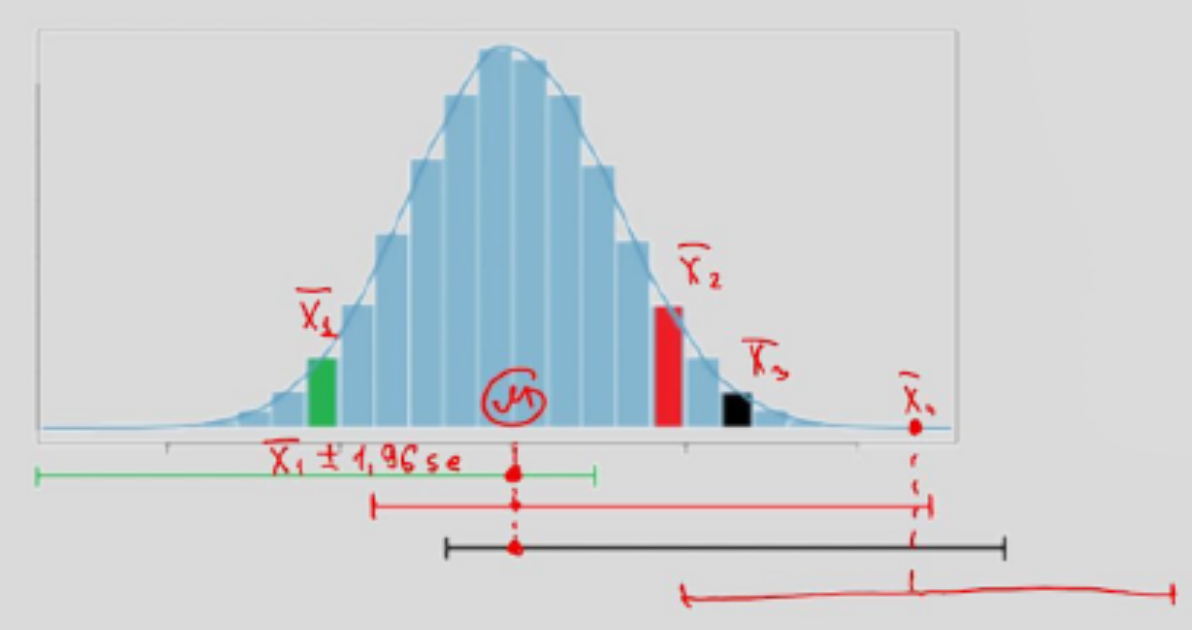

Выше была опиана идея t-теста, то есть попарного сравнения каждой из гипотез с нулевой. В ANOVA мы сравниваем между собой несколько гипотез особым путем. 

 - Мы считаем среднюю дисперсию внутри каждой из выборок (sum of squares within groups SSW), отаржающую разброс значений внутри каждой из локаций.
 

$$SSW = \sum_{i=1}^{N_1}(x_i - \bar{x}_1)^2 + \sum_{i=1}^{N_2}(x_i - \bar{x}_2)^2 + ... + \sum_{i=1}^{N_k}(x_i - \bar{x}_k)^2$$,

где $k$ - количество групп, $N_k$ - количество измерений в группе и $\bar{x}_k$ - среднее для группы.
 
 - Затем мы считаем (sum of squares between groups SSB), отражающую разброс значений между локациями, то есть насколько различаются локации.
 
$$SSB = \sum_{k}N_k(\bar{x}_k - \bar{\bar{x}})^2$$

где $\bar{\bar{x}}$ - это среднее среди всех групп (локаций):

$$\bar{\bar{x}} = \frac{\bar{x}_1 + \bar{x}_2 + ... + \bar{x}_k}{N_1 + N_2 + ... + N_k}$$

 - Далее рассчитваем F-value как отношение межгрупповой разницы (SSB) к внутригрупповой (SSW):
 
$$F = \frac{\frac{SSB}{dof_{SSB}}}{\frac{SSW}{dof_{SSW}}}$$

где

$$dof_{SSW} = (N_1 - 1) + (N_2 - 1) + ... + (N_k - 1)$$
$$dof_{SSB} = k - 1 $$

Чем больше F-value, тем больше межгрупповая разница (относительно внутригрупповой).

Заем из F-value через F-распределение считается p-value, чтобы понять есть ли значимые разлиие между группами.

In [6]:
F_ANOVA, p_value_ANOVA = My_DataAnalyzer.get_ANOVA_F_p_value()

In [7]:
F_ANOVA

1.0625737434443432

In [8]:
p_value_ANOVA

0.36563342030867907

Метод Тьюки проводит попарное сравнение всех гипотез и выдает p-value и CI для каждой пары.

In [9]:
TUKEY_results = My_DataAnalyzer.get_TUKEY_results()

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.283     0.984    -2.317     1.751
 (0 - 2)      0.665     0.833    -1.369     2.699
 (0 - 3)     -0.699     0.811    -2.733     1.335
 (1 - 0)      0.283     0.984    -1.751     2.317
 (1 - 2)      0.948     0.624    -1.086     2.982
 (1 - 3)     -0.416     0.952    -2.450     1.618
 (2 - 0)     -0.665     0.833    -2.699     1.369
 (2 - 1)     -0.948     0.624    -2.982     1.086
 (2 - 3)     -1.364     0.308    -3.398     0.670
 (3 - 0)      0.699     0.811    -1.335     2.733
 (3 - 1)      0.416     0.952    -1.618     2.450
 (3 - 2)      1.364     0.308    -0.670     3.398



In [10]:
{i:list(data_dropped.keys())[i] for i in range(0,len(list(data_dropped.keys())))}

{0: 'Mülheimer Park', 1: 'Bahnhof Mülheim', 2: 'Rheininsel', 3: 'Opel Bauer'}

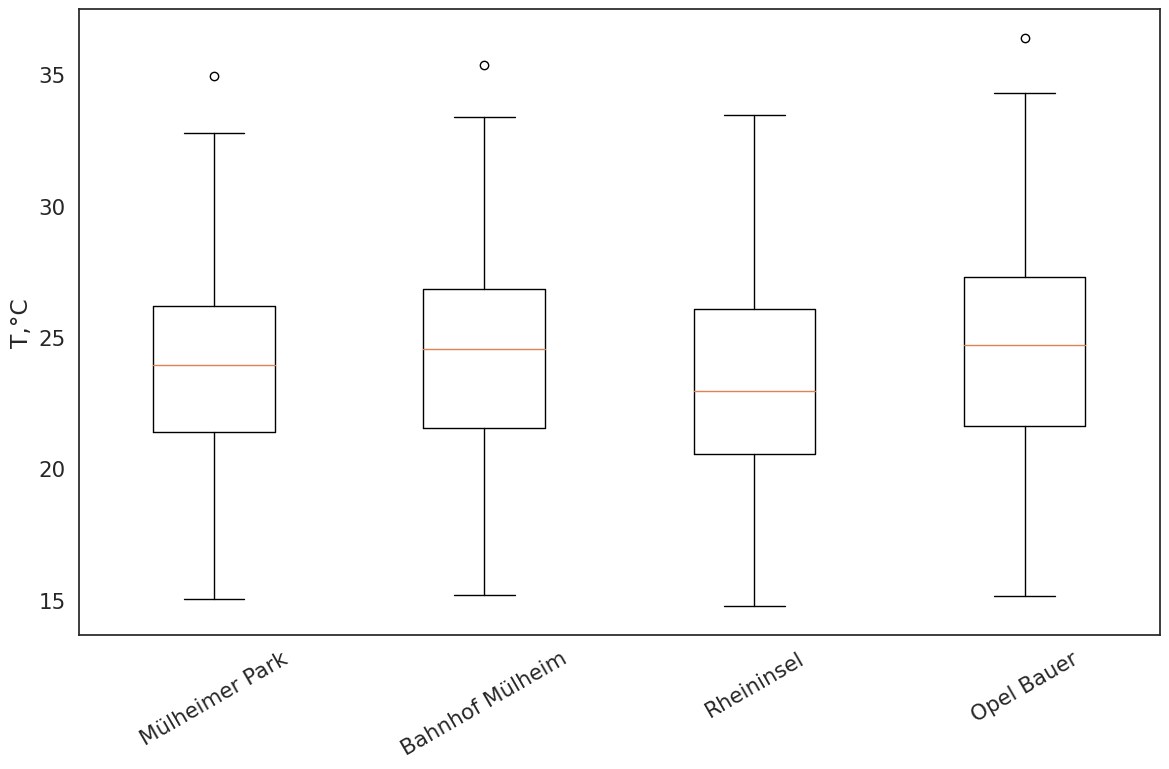

In [15]:
My_DataAnalyzer.plot_mean_std()

In [16]:
My_DataAnalyzer.get_TUKEY_matrix()

,Mülheimer Park,Bahnhof Mülheim,Rheininsel,Opel Bauer
Mülheimer Park,1.000000,0.984018,0.832616,0.810633
Bahnhof Mülheim,0.984018,1.000000,0.624058,0.951957
Rheininsel,0.832616,0.624058,1.000000,0.308118
Opel Bauer,0.810633,0.951957,0.308118,1.000000


In [17]:
My_DataAnalyzer.describe_dropped_data()

,count,mean,std,min,25%,50%,75%,max
Mülheimer Park,62.0,24.432660,4.205220,15.036573,21.387564,23.942955,26.202016,34.962682
Bahnhof Mülheim,62.0,24.715614,4.318271,15.194582,21.545036,24.577423,26.848827,35.356336
Rheininsel,62.0,23.767752,4.434195,14.766336,20.556786,22.951718,26.066966,33.474545
Opel Bauer,62.0,25.131692,4.548704,15.153691,21.614634,24.720145,27.301914,36.409418


In [18]:
My_DataAnalyzer.describe_data()

,count,mean,std,min,25%,50%,75%,max
Mülheimer Park,62.0,24.432660,4.205220,15.036573,21.387564,23.942955,26.202016,34.962682
Bahnhof Mülheim,62.0,24.715614,4.318271,15.194582,21.545036,24.577423,26.848827,35.356336
Rheininsel,62.0,23.767752,4.434195,14.766336,20.556786,22.951718,26.066966,33.474545
Mülheimer Park 2,51.0,24.276001,4.438628,14.542027,21.245250,23.867327,26.726771,34.419718
Opel Bauer,62.0,25.131692,4.548704,15.153691,21.614634,24.720145,27.301914,36.409418
Volksgarten - 1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volksgarten - 2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ------------------------------------ summer 2021 ------------------------------------

In [19]:
data = My_DataAnalyzer.get_data(date_from='2021-07-01',date_to='2021-08-31')
data_params = My_DataAnalyzer.get_data_params()

In [20]:
data_dropped = My_DataAnalyzer.get_data_dropped()
data_dropped_params = My_DataAnalyzer.get_data_dropped_params()

In [21]:
F_ANOVA, p_value_ANOVA = My_DataAnalyzer.get_ANOVA_F_p_value()

In [22]:
F_ANOVA

9.622668838536486

In [23]:
p_value_ANOVA

4.997583846977349e-06

In [24]:
TUKEY_results = My_DataAnalyzer.get_TUKEY_results()

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      1.761     0.003     0.462     3.060
 (0 - 2)      0.091     0.998    -1.209     1.390
 (0 - 3)      2.112     0.000     0.812     3.411
 (1 - 0)     -1.761     0.003    -3.060    -0.462
 (1 - 2)     -1.670     0.006    -2.969    -0.371
 (1 - 3)      0.351     0.898    -0.949     1.650
 (2 - 0)     -0.091     0.998    -1.390     1.209
 (2 - 1)      1.670     0.006     0.371     2.969
 (2 - 3)      2.021     0.000     0.722     3.320
 (3 - 0)     -2.112     0.000    -3.411    -0.812
 (3 - 1)     -0.351     0.898    -1.650     0.949
 (3 - 2)     -2.021     0.000    -3.320    -0.722



In [26]:
{i:list(data_dropped.keys())[i] for i in range(0,len(list(data_dropped.keys())))}

{0: 'Bahnhof Mülheim',
 1: 'Mülheimer Park 2',
 2: 'Opel Bauer',
 3: 'Volksgarten - 1'}

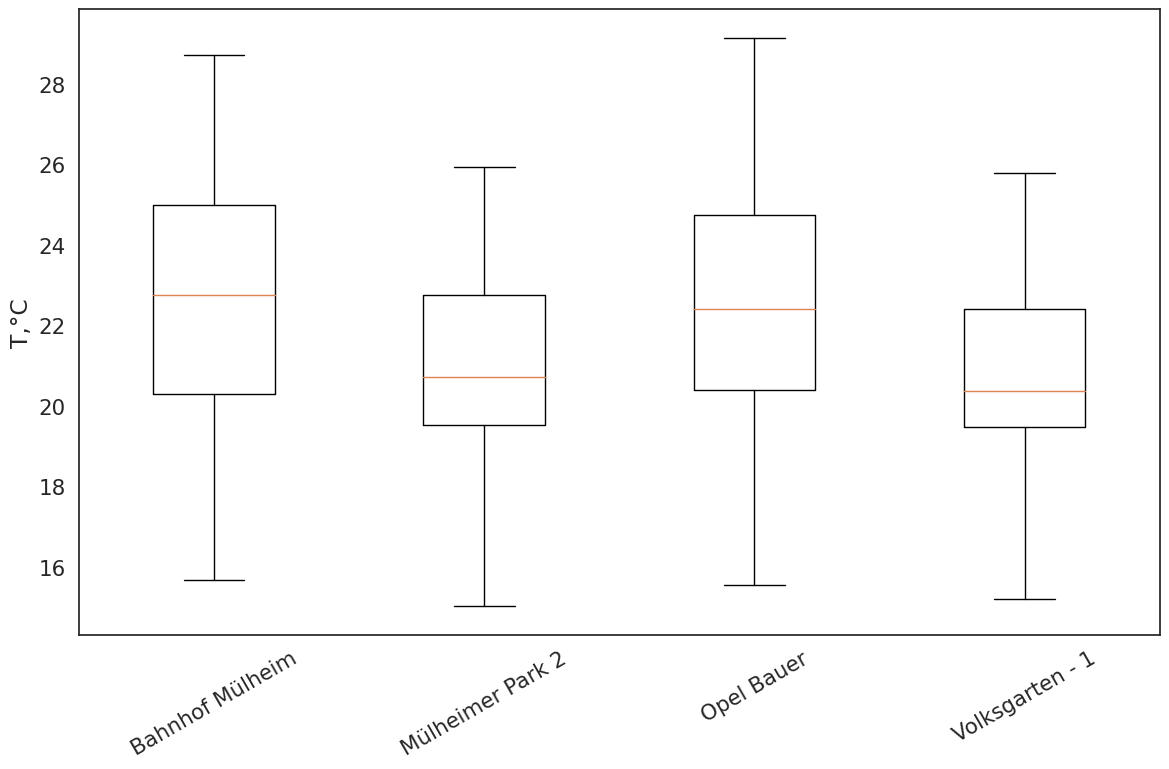

In [27]:
My_DataAnalyzer.plot_mean_std()

In [28]:
My_DataAnalyzer.get_TUKEY_matrix()

,Bahnhof Mülheim,Mülheimer Park 2,Opel Bauer,Volksgarten - 1
Bahnhof Mülheim,1.000000,0.003022,0.997904,0.000214
Mülheimer Park 2,0.003022,1.000000,0.005589,0.897666
Opel Bauer,0.997904,0.005589,1.000000,0.000442
Volksgarten - 1,0.000214,0.897666,0.000442,1.000000


In [29]:
My_DataAnalyzer.describe_dropped_data()

,count,mean,std,min,25%,50%,75%,max
Bahnhof Mülheim,62.0,22.590269,3.126837,15.695040,20.314950,22.774200,25.001558,28.73971
Mülheimer Park 2,62.0,20.829420,2.525048,15.029010,19.527803,20.719970,22.765490,25.94119
Opel Bauer,62.0,22.499570,3.145612,15.559780,20.407143,22.420120,24.758623,29.15761
Volksgarten - 1,62.0,20.478710,2.287106,15.203333,19.478381,20.385429,22.412917,25.80000


In [30]:
My_DataAnalyzer.describe_data()

,count,mean,std,min,25%,50%,75%,max
Mülheimer Park,53.0,21.476891,2.628527,16.029710,19.810380,21.336930,23.663110,26.62589
Bahnhof Mülheim,62.0,22.590269,3.126837,15.695040,20.314950,22.774200,25.001558,28.73971
Rheininsel,29.0,21.399463,2.191759,15.291060,20.149160,21.050000,23.132920,24.75221
Mülheimer Park 2,62.0,20.829420,2.525048,15.029010,19.527803,20.719970,22.765490,25.94119
Opel Bauer,62.0,22.499570,3.145612,15.559780,20.407143,22.420120,24.758623,29.15761
Volksgarten - 1,62.0,20.478710,2.287106,15.203333,19.478381,20.385429,22.412917,25.80000
Volksgarten - 2,51.0,22.667716,3.746820,15.212571,19.894667,22.291667,25.553167,29.20000


# ------------------------------------ summer 2022 ------------------------------------

In [31]:
data = My_DataAnalyzer.get_data(date_from='2022-07-01',date_to='2022-08-31')
data_params = My_DataAnalyzer.get_data_params()

In [32]:
data_dropped = My_DataAnalyzer.get_data_dropped()
data_dropped_params = My_DataAnalyzer.get_data_dropped_params()

In [33]:
F_ANOVA, p_value_ANOVA = My_DataAnalyzer.get_ANOVA_F_p_value()

In [34]:
F_ANOVA

5.538243560399289

In [35]:
p_value_ANOVA

0.001078529493540037

In [36]:
TUKEY_results = My_DataAnalyzer.get_TUKEY_results()

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.537     0.870    -1.279     2.352
 (0 - 2)     -0.557     0.857    -2.373     1.259
 (0 - 3)      2.152     0.013     0.336     3.968
 (1 - 0)     -0.537     0.870    -2.352     1.279
 (1 - 2)     -1.093     0.405    -2.909     0.722
 (1 - 3)      1.615     0.101    -0.200     3.431
 (2 - 0)      0.557     0.857    -1.259     2.373
 (2 - 1)      1.093     0.405    -0.722     2.909
 (2 - 3)      2.709     0.001     0.893     4.525
 (3 - 0)     -2.152     0.013    -3.968    -0.336
 (3 - 1)     -1.615     0.101    -3.431     0.200
 (3 - 2)     -2.709     0.001    -4.525    -0.893



In [38]:
{i:list(data_dropped.keys())[i] for i in range(0,len(list(data_dropped.keys())))}

{0: 'Bahnhof Mülheim', 1: 'Rheininsel', 2: 'Opel Bauer', 3: 'Volksgarten - 1'}

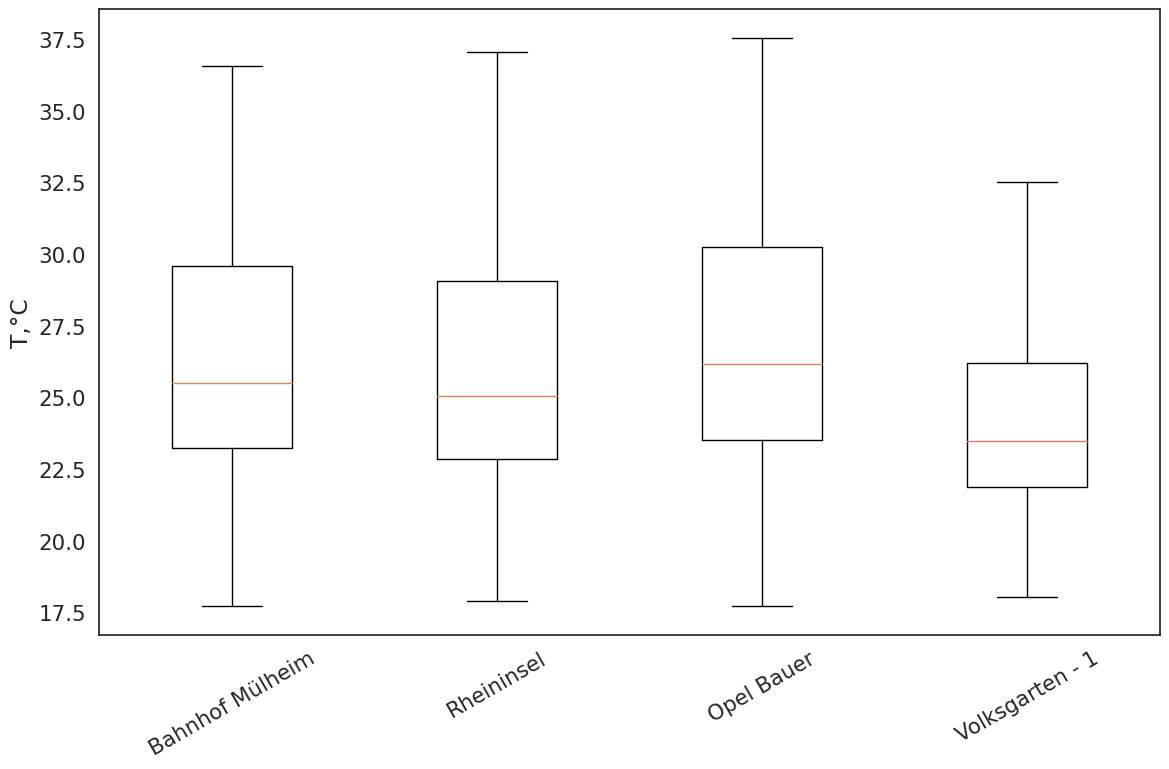

In [39]:
My_DataAnalyzer.plot_mean_std()

In [40]:
My_DataAnalyzer.get_TUKEY_matrix()

,Bahnhof Mülheim,Rheininsel,Opel Bauer,Volksgarten - 1
Bahnhof Mülheim,1.000000,0.870334,0.857475,0.012824
Rheininsel,0.870334,1.000000,0.404829,0.100514
Opel Bauer,0.857475,0.404829,1.000000,0.000835
Volksgarten - 1,0.012824,0.100514,0.000835,1.000000


In [41]:
My_DataAnalyzer.describe_dropped_data()

,count,mean,std,min,25%,50%,75%,max
Bahnhof Mülheim,62.0,26.207353,4.075228,17.72550,23.246590,25.497425,29.606098,36.561090
Rheininsel,62.0,25.670713,4.090477,17.92055,22.861493,25.054260,29.064872,37.047500
Opel Bauer,62.0,26.764159,4.293245,17.72037,23.506745,26.171300,30.261285,37.555970
Volksgarten - 1,62.0,24.055283,3.053732,18.04500,21.882500,23.499667,26.195000,32.514524


In [42]:
My_DataAnalyzer.describe_data()

,count,mean,std,min,25%,50%,75%,max
Mülheimer Park,32.0,23.540976,3.887874,16.979650,20.300305,23.297455,24.955707,35.023000
Bahnhof Mülheim,62.0,26.207353,4.075228,17.725500,23.246590,25.497425,29.606098,36.561090
Rheininsel,62.0,25.670713,4.090477,17.920550,22.861493,25.054260,29.064872,37.047500
Mülheimer Park 2,30.0,27.170399,3.622798,20.732420,24.057370,27.394690,30.543100,32.809230
Opel Bauer,62.0,26.764159,4.293245,17.720370,23.506745,26.171300,30.261285,37.555970
Volksgarten - 1,62.0,24.055283,3.053732,18.045000,21.882500,23.499667,26.195000,32.514524
Volksgarten - 2,52.0,28.582445,5.216922,18.697762,25.040250,28.535833,32.156389,41.647778


# ----------------------------------- Winter -----------------------------------

In [43]:
data = My_DataAnalyzer.get_data(date_from='2020-12-01',date_to='2021-02-28')
data_params = My_DataAnalyzer.get_data_params()

In [44]:
My_DataAnalyzer.describe_data()

,count,mean,std,min,25%,50%,75%,max
Mülheimer Park,49.0,6.858301,5.676086,-3.77952,2.761300,6.157110,10.729920,19.45821
Bahnhof Mülheim,90.0,6.849197,4.815364,-4.07840,3.297543,5.831073,10.323407,19.97975
Rheininsel,80.0,6.747231,4.525411,-1.45159,3.323572,5.568555,9.892936,19.45821
Mülheimer Park 2,90.0,6.312809,4.657245,-4.48898,3.052428,5.528427,9.558580,18.90755
Opel Bauer,90.0,6.875136,4.807664,-3.59301,3.403262,5.789459,10.366503,20.08011
Volksgarten - 1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volksgarten - 2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data = My_DataAnalyzer.get_data(date_from='2021-12-01',date_to='2022-02-28')
data_params = My_DataAnalyzer.get_data_params()

In [46]:
My_DataAnalyzer.describe_data()

,count,mean,std,min,25%,50%,75%,max
Mülheimer Park,90.0,7.492075,3.052498,1.957470,5.198065,6.933100,9.702053,15.121650
Bahnhof Mülheim,90.0,7.743992,3.054367,2.108110,5.415672,7.243350,9.925807,15.519530
Rheininsel,27.0,6.702116,2.498133,1.959340,5.383830,6.545660,9.012630,10.512150
Mülheimer Park 2,57.0,7.489994,2.884663,3.131130,5.220130,6.997800,9.882750,13.674590
Opel Bauer,90.0,7.719788,3.018602,2.504950,5.522622,7.302070,9.948058,15.710120
Volksgarten - 1,90.0,7.230651,2.553153,2.112667,5.408000,6.959833,8.993333,13.377667
Volksgarten - 2,90.0,7.395606,3.081451,1.653333,5.156250,6.840833,9.714333,15.478333
